In [68]:
import pandas as pd
import seaborn as sns
from datetime import datetime

NHL_df = pd.read_csv("Player_data.csv")
census_df = pd.read_csv("births/US_births_1994-2003_CDC_NCHS.csv")



In [69]:
date = datetime.strptime(NHL_df.birthDate.values[0],'%Y-%m-%d')
NHL_df["year"] = NHL_df.apply(lambda row: datetime.strptime(row["birthDate"], '%Y-%m-%d').year, axis=1)
NHL_df["month"] = NHL_df.apply(lambda row: datetime.strptime(row["birthDate"], '%Y-%m-%d').month, axis=1)
NHL_df["day"] = NHL_df.apply(lambda row: datetime.strptime(row["birthDate"], '%Y-%m-%d').day, axis=1)

In [78]:
NHL_count = NHL_df.groupby('month')["lastName"].count()
NHL_count

month
1     74
2     73
3     83
4     68
5     79
6     54
7     83
8     51
9     46
10    65
11    48
12    49
Name: lastName, dtype: int64

In [89]:

df = pd.DataFrame(census_df.groupby("month")["births"].sum())
total = sum(df["births"].values)
df["normalized_census"] = df.apply(lambda row: row["births"]/total * 100, axis=1)

In [99]:
NHL_count_df = pd.DataFrame(NHL_count)
total = sum(NHL_count_df["lastName"].values)
df["normalized_NHL"] = NHL_count_df.apply(lambda row: row["lastName"]/total * 100, axis=1)






pandas.core.frame.DataFrame

In [101]:
df = df.reset_index()

longboy = pd.melt(df, id_vars='month', value_vars=['normalized_census', 'normalized_NHL'])


,month,variable,value
0,1,normalized_census,8.137822
1,2,normalized_census,7.598131
2,3,normalized_census,8.363269
3,4,normalized_census,8.018990
4,5,normalized_census,8.435868
5,6,normalized_census,8.298974
6,7,normalized_census,8.808144
7,8,normalized_census,8.876305
8,9,normalized_census,8.659398
9,10,normalized_census,8.506123


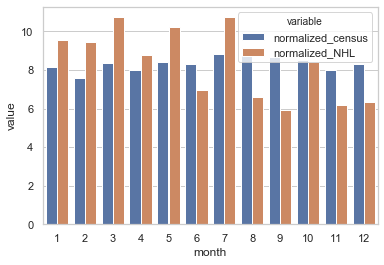

In [108]:
sns.set(style="whitegrid")
ax = sns.barplot(x="month", y="value", hue = "variable", data=longboy)